# Inference: Adaptive Covariance: localised MCMC

This example shows you how to perform Bayesian inference on a time series, using a variant of [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc_remi.html) detailed in Algorithm 7 of [1], which involves using a vector of possible proposal distributions.

[1] A tutorial on adaptive MCMC
    Christophe Andrieu and Johannes Thoms, Statistical Computing,
    2008, 18: 343-373

It follows on from the [first sampling example](./sampling-first-example.ipynb).

Running...


C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_mcmc\_adaptive_covariance.py:151: RuntimeWarning: overflow encountered in exp
  self._alpha = np.minimum(1, np.exp(r))


Done!
R-hat:
[1.0377726669719909, 1.05069016558705, 1.0178227876844745]


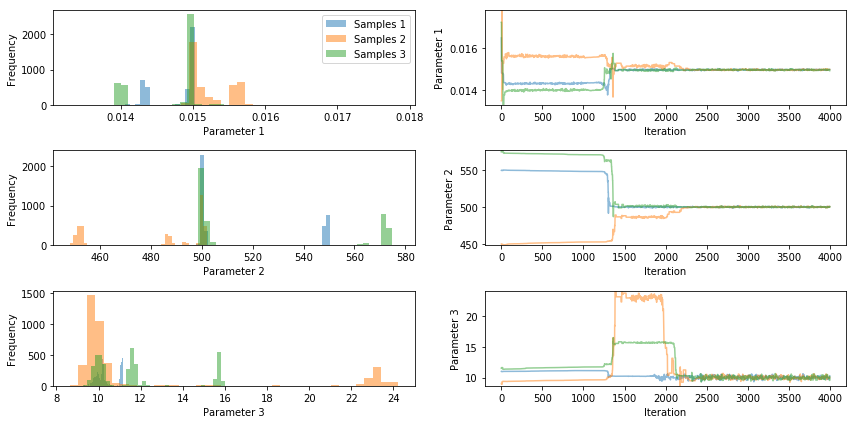

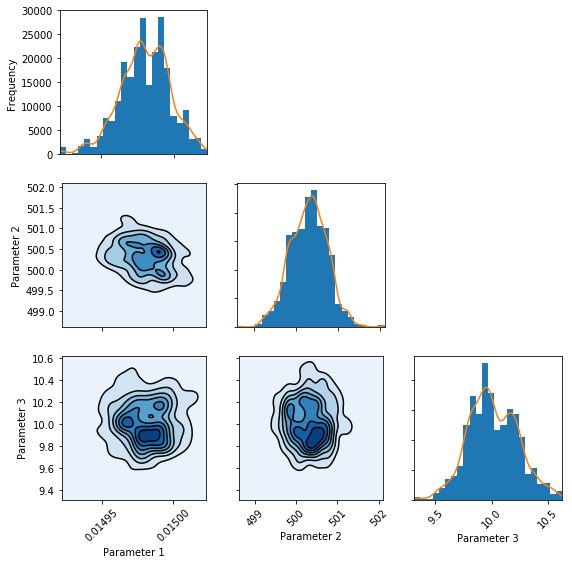

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints4/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine with four chains
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.AdaptiveCovarianceAMGlobalAdaptiveMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

In [15]:
from sklearn import mixture
import numpy as np

In [16]:
n_samples = 500
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]


In [24]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(X)

In [25]:
gmm.aic(X)

4549.9506291394346

In [13]:
gmm.means_

array([[-6.1660676 ,  2.51041519],
       [ 1.9978114 ,  0.46896122],
       [-1.98440063, -0.47634699],
       [-5.82310356,  3.40806097],
       [ 0.05017123,  0.01676599]])

In [14]:
gmm.weights_

array([ 0.23686397,  0.12665139,  0.13824544,  0.26313604,  0.23510317])

In [29]:
[4 for i in range(0,5)]

[4, 4, 4, 4, 4]

In [44]:
from scipy.stats import multivariate_normal
mu = [[1,1], [1,2]]
sigma = [[[1,0],[0,1]],[[2,0],[0,1]]]
i = 0
lambda x: multivariate_normal.logpdf(x, mu[i], self._sigma[i])

<function __main__.<lambda>>

In [37]:
from scipy.stats import multivariate_normal
lambda x: multivariate_normal.logpdf(x, mu[1], self._sigma[1])

<function __main__.<lambda>>

In [45]:
q_l = [lambda x: multivariate_normal.logpdf(x, mu[i], self._sigma[i]) for i in range(2)]

In [46]:
np.sum([1,2,3])

6

In [47]:
from scipy.misc import logsumexp

In [48]:
logsumexp([1,2,3])

3.4076059644443806

In [50]:
np.array([1,2,3])-1

array([0, 1, 2])

In [60]:
np.random.choice(4, 100, [0.25, 0.25, 0.25, 0.25])

array([0, 2, 0, 2, 0, 1, 1, 3, 3, 3, 2, 2, 0, 1, 2, 2, 3, 2, 0, 2, 2, 3, 3,
       3, 0, 2, 0, 1, 1, 3, 0, 2, 0, 1, 0, 1, 1, 3, 1, 0, 0, 3, 0, 1, 0, 2,
       3, 1, 0, 2, 3, 0, 0, 1, 2, 1, 3, 2, 0, 1, 1, 2, 0, 1, 1, 1, 0, 3, 0,
       3, 0, 1, 1, 3, 0, 2, 1, 0, 0, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 1, 0,
       1, 0, 1, 3, 0, 0, 0, 0])